# PRINCIPAL COMPONENT ANALYSIS
PCA is an unsupervised learning technique which does not require labeled data

It is also a dimensionality reduction technique which can be used to compress data and experiment with its effects on machine learning algorithms as a preprocessing step

Essentially, PCA, or Principal Component Analysis, attempts to capture as much information from the dataset as possible while reducing the overall number of features.

There are four steps to conducting PCA:

    * Center each feature by subtracting the feature mean
    * Calculate the covariance matrix for your normalized dataset
    * Calculate the eigenvectors/eigenvalues for the covariance matrix
        * Reorder your eigenvectors based on their accompanying eigenvalues (in descending order of the eigenvalues)
    * Take the dot product of the transpose of the eigenvectors with the transpose of the normalized data

In [1]:
#Generate quick data to perform PCA
import numpy as np

x1 = np.linspace(-10, 10, 100)
# A linear relationship, plus a little noise
x2 = np.array([xi*2 + np.random.normal(loc=0, scale=0.5) for xi in x1]) 

X = np.matrix(list(zip(x1, x2)))

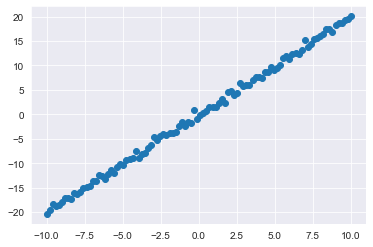

In [2]:
#Generating a quick plot of this simple dataset to further orient ourselves:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

plt.scatter(x1, x2);

In [3]:
#implementing PCA with scikit-learn
from sklearn.decomposition import PCA

pca = PCA()
transformed = pca.fit_transform(X)

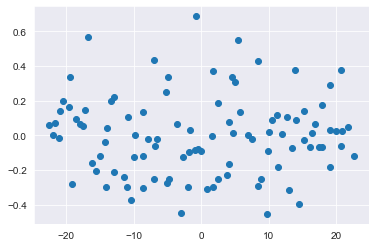

In [4]:
# plotting updated dataset
plt.scatter(transformed[:,0], transformed[:,1]);

In [5]:
pca.components_

array([[-0.4468691 , -0.89459935],
       [-0.89459935,  0.4468691 ]])

In [6]:
pca.mean_

array([ 7.10542736e-17, -8.80959364e-02])

PCA transforms the dataset along principal axes. The first of these axes is designed to capture the maximum variance within the data. From here, additional axes are constructed which are orthogonal to the previous axes and continue to account for as much of the remaining variance as possible.

For the current 2-d case, the axes which the data were projected onto look like this:

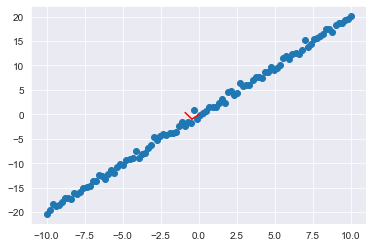

In [7]:
plt.scatter(x1, x2);
ax1, ay1 = pca.mean_[0], pca.mean_[1]
ax2, ay2 = pca.mean_[0] + pca.components_[0][0], pca.mean_[1] + pca.components_[0][1]
ax3, ay3 = pca.mean_[0] + pca.components_[1][0], pca.mean_[1] + pca.components_[1][1]
plt.plot([ax1, ax2], [ay1, ay2], color='red')
plt.plot([ax2, ax3], [ay2, ay3], color='red');

So, the updated graph you saw is the same dataset rotated onto these red axes:

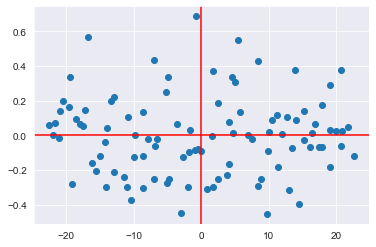

In [8]:
plt.scatter(transformed[:,0], transformed[:,1])
plt.axhline(color='red')
plt.axvline(color='red');

Note the small scale of the y-axis. You can also plot the transformed dataset on the new axes with a scale similar to what you saw before:

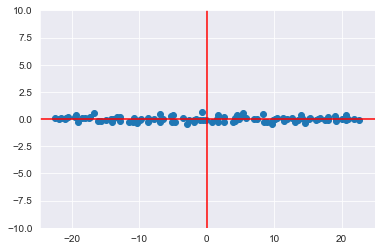

In [9]:
plt.scatter(transformed[:,0], transformed[:,1])
plt.axhline(color='red')
plt.axvline(color='red')
plt.ylim(-10,10);

Again, this is the geographical interpretation of what just happened:

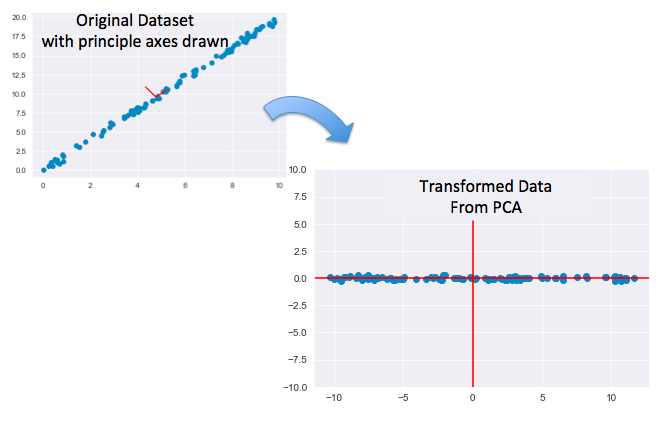

Typically, one would use PCA to actually reduce the number of dimensions. In this case, you've simply re-re-parametrized the dataset along new axes. That said, if you look at the first of these primary axes, you can see the patterns encapsulated by the principal component. Moreover, scikit-learn also lets you quickly determine the overall variance in the dataset accounted for in each of the principal components.

In [10]:
pca.explained_variance_ratio_

array([9.99693687e-01, 3.06313178e-04])

Keep in mind that these quantities are cumulative: principal component 2 attempts to account for the variance not accounted for in the primary component. You can view the total variance using `np.cumsum()`:

In [11]:
np.cumsum(pca.explained_variance_ratio_)

array([0.99969369, 1.        ])

To help demonstrate the structure captured by the first principal component, observe the impact of coloring the dataset and then visualizing the first component.

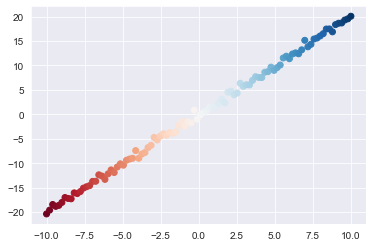

In [12]:
plt.scatter(x1,x2, c=sns.color_palette('RdBu', n_colors=100));

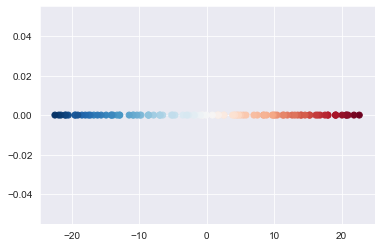

In [13]:
plt.scatter(transformed[:,0], [0 for i in range(100)] , c=sns.color_palette('RdBu', n_colors=100));

### Steps for Performing PCA

The theory behind PCA rests upon many foundational concepts of linear algebra. After all, PCA is re-encoding a dataset into an alternative basis (the axes). Here are the exact steps:

1. Recenter each feature of the dataset by subtracting that feature's mean from the feature vector
2. Calculate the covariance matrix for your centered dataset
3. Calculate the eigenvectors of the covariance matrix
    1. You'll further investigate the concept of eigenvectors in the upcoming lesson
4. Project the dataset into the new feature space: Multiply the eigenvectors by the mean-centered features

In [14]:
# Pulling up the original feature means which were used to center the data
pca.mean_ 

array([ 7.10542736e-17, -8.80959364e-02])

In [15]:
# Pulling up the covariance matrix of the mean centered data
pca.get_covariance() 

array([[ 34.35023637,  68.66128181],
       [ 68.66128181, 137.50752061]])

In [16]:
# Pulling up the eigenvectors of the covariance matrix
pca.components_ 

array([[-0.4468691 , -0.89459935],
       [-0.89459935,  0.4468691 ]])

### Implementing PCA (Iris Dataset)

In [17]:
#Loading our data
from sklearn import datasets
import pandas as pd
 
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = iris.get('target')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Before performing PCA and visualizing the principal components, it's helpful to get a little more context regarding the data that we'll be working with. We are going to visualize the pairwise feature plots. With this, we will notice how the target labels are easily separable by any one of the given features.

AttributeError: 'SubplotSpec' object has no attribute 'is_first_col'

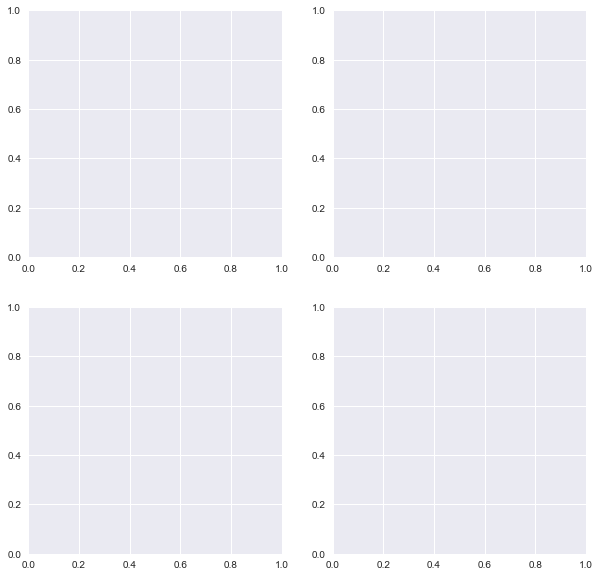

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

pd.plotting.scatter_matrix(df, figsize=(10,10));

In [21]:
# Create features and target datasets
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = df[features].values
y = df['Target'].values

In [22]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Standardize the features
X = StandardScaler().fit_transform(X)

# Preview X
pd.DataFrame(data=X, columns=features).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


Now its time to perform PCA! Project the original data which is 4 dimensional into 2 dimensions. The new components are just the two main dimensions of variance present in the data.

In [23]:
# Import PCA
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA(n_components=2)

# Fit PCA
principalComponents = pca.fit_transform(X)

To visualize the components, it will be useful to also look at the target associated with the particular observation. As such, append the target (flower type) to the principal components in a pandas dataframe.

In [24]:
# Create a new dataset from principal components 
df = pd.DataFrame(data = principalComponents, 
                  columns = ['PC1', 'PC2'])

target = pd.Series(iris['target'], name='target')

result_df = pd.concat([df, target], axis=1)
result_df.head(5)

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


Using the target data, we can visualize the principal components according to the class distribution. 
- Create a scatter plot from principal components while color coding the examples according to what flower type each example is classified as

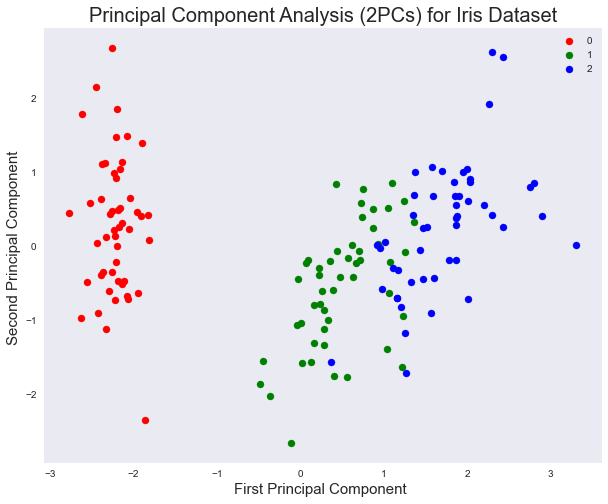

In [26]:
# Principal Componets scatter plot
plt.style.use('seaborn')
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Principal Component ', fontsize = 15)
ax.set_ylabel('Second Principal Component ', fontsize = 15)
ax.set_title('Principal Component Analysis (2PCs) for Iris Dataset', fontsize = 20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = iris['target'] == target
    ax.scatter(result_df.loc[indicesToKeep, 'PC1'], 
               result_df.loc[indicesToKeep, 'PC2'], 
               c = color, 
               s = 50)
ax.legend(targets)
ax.grid()

In [31]:
# Calculate the variance explained by priciple components
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.72962445 0.22850762]

 Total Variance Explained: 95.81


As you should see, these first two principal components account for the vast majority of the overall variance in the dataset. This is indicative of the total information encapsulated in the compressed representation compared to the original encoding.

Since the principal components explain 95% of the variance in the data, it is interesting to consider how a classifier trained on the compressed version would compare to one trained on the original dataset. (Compare performance with KNN classifier)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import time

X = iris.data
y = iris.target
start = time.time()
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=9)
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
Yhat = model.predict(X_test)
acc = metrics.accuracy_score(Yhat, Y_test)
end = time.time()
print('Accuracy:', acc)
print ('Time Taken:', end - start)

Accuracy: 1.0
Time Taken: 0.0


C:\Users\msagu\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Great, so you can see that we are able to classify the data with 100% accuracy in the given time. Repeating above process for the dataset made from principal components:

In [33]:
# Run the classifer on PCA'd data
X = result_df[['PC1', 'PC2']]
y = result_df['target']

start = time.time()
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=9)
model = KNeighborsClassifier()
model.fit(X_train.values, Y_train.values)
Yhat = model.predict(X_test.values)
acc = metrics.accuracy_score(Yhat, Y_test.values)
end = time.time()
print('Accuracy:', acc)
print ('Time Taken:', end - start)

Accuracy: 0.9666666666666667
Time Taken: 0.009125947952270508


C:\Users\msagu\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Although some accuracy is lost in this representation of the data, we were able to use half of the number of features to train the model!

In more complex cases, PCA can even improve the accuracy of some machine learning tasks. In particular, PCA can be useful to reduce overfitting.

C:\Users\msagu\anaconda3\envs\learn-env\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


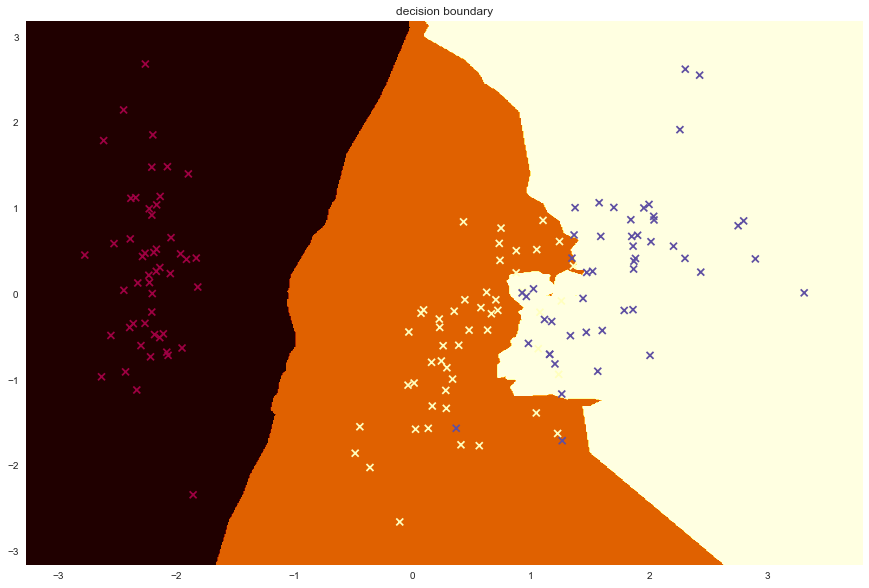

In [34]:
#visualize the decision boundary learned by the k-nearest neighbor classification model 
#trained using the principal components of the data.

# Plot decision boundary using principal components 
import numpy as np
def decision_boundary(pred_func):
    
    # Set the boundary
    x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
    y_min, y_max = X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5
    h = 0.01
    
    # Build meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour
    plt.figure(figsize=(15,10))
    plt.contourf(xx, yy, Z, cmap=plt.cm.afmhot)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Spectral, marker='x')

decision_boundary(lambda x: model.predict(x))

plt.title('decision boundary');

### Integrating PCA in Pipelines (Otto Group Dataset)
The Otto Group is one of the world’s biggest e-commerce companies, with subsidiaries in more than 20 countries, including Crate & Barrel (USA), Otto.de (Germany) and 3 Suisses (France). They are selling millions of products worldwide every day, with several thousand products being added to their product line.

A consistent analysis of the performance of their products is crucial. However, due to their global infrastructure, many identical products get classified differently. Therefore, the quality of product analysis depends heavily on the ability to accurately cluster similar products. The better the classification, the more insights the Otto Group can generate about their product range.

In [35]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Loading data
data = pd.read_csv("otto_group.csv")
data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [36]:
# Checking column data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       61878 non-null  int64 
 1   feat_1   61878 non-null  int64 
 2   feat_2   61878 non-null  int64 
 3   feat_3   61878 non-null  int64 
 4   feat_4   61878 non-null  int64 
 5   feat_5   61878 non-null  int64 
 6   feat_6   61878 non-null  int64 
 7   feat_7   61878 non-null  int64 
 8   feat_8   61878 non-null  int64 
 9   feat_9   61878 non-null  int64 
 10  feat_10  61878 non-null  int64 
 11  feat_11  61878 non-null  int64 
 12  feat_12  61878 non-null  int64 
 13  feat_13  61878 non-null  int64 
 14  feat_14  61878 non-null  int64 
 15  feat_15  61878 non-null  int64 
 16  feat_16  61878 non-null  int64 
 17  feat_17  61878 non-null  int64 
 18  feat_18  61878 non-null  int64 
 19  feat_19  61878 non-null  int64 
 20  feat_20  61878 non-null  int64 
 21  feat_21  61878 non-null  int64 
 22

In [37]:
#checking missing values
data.isna().any()

id         False
feat_1     False
feat_2     False
feat_3     False
feat_4     False
           ...  
feat_90    False
feat_91    False
feat_92    False
feat_93    False
target     False
Length: 95, dtype: bool

AttributeError: 'SubplotSpec' object has no attribute 'is_first_col'

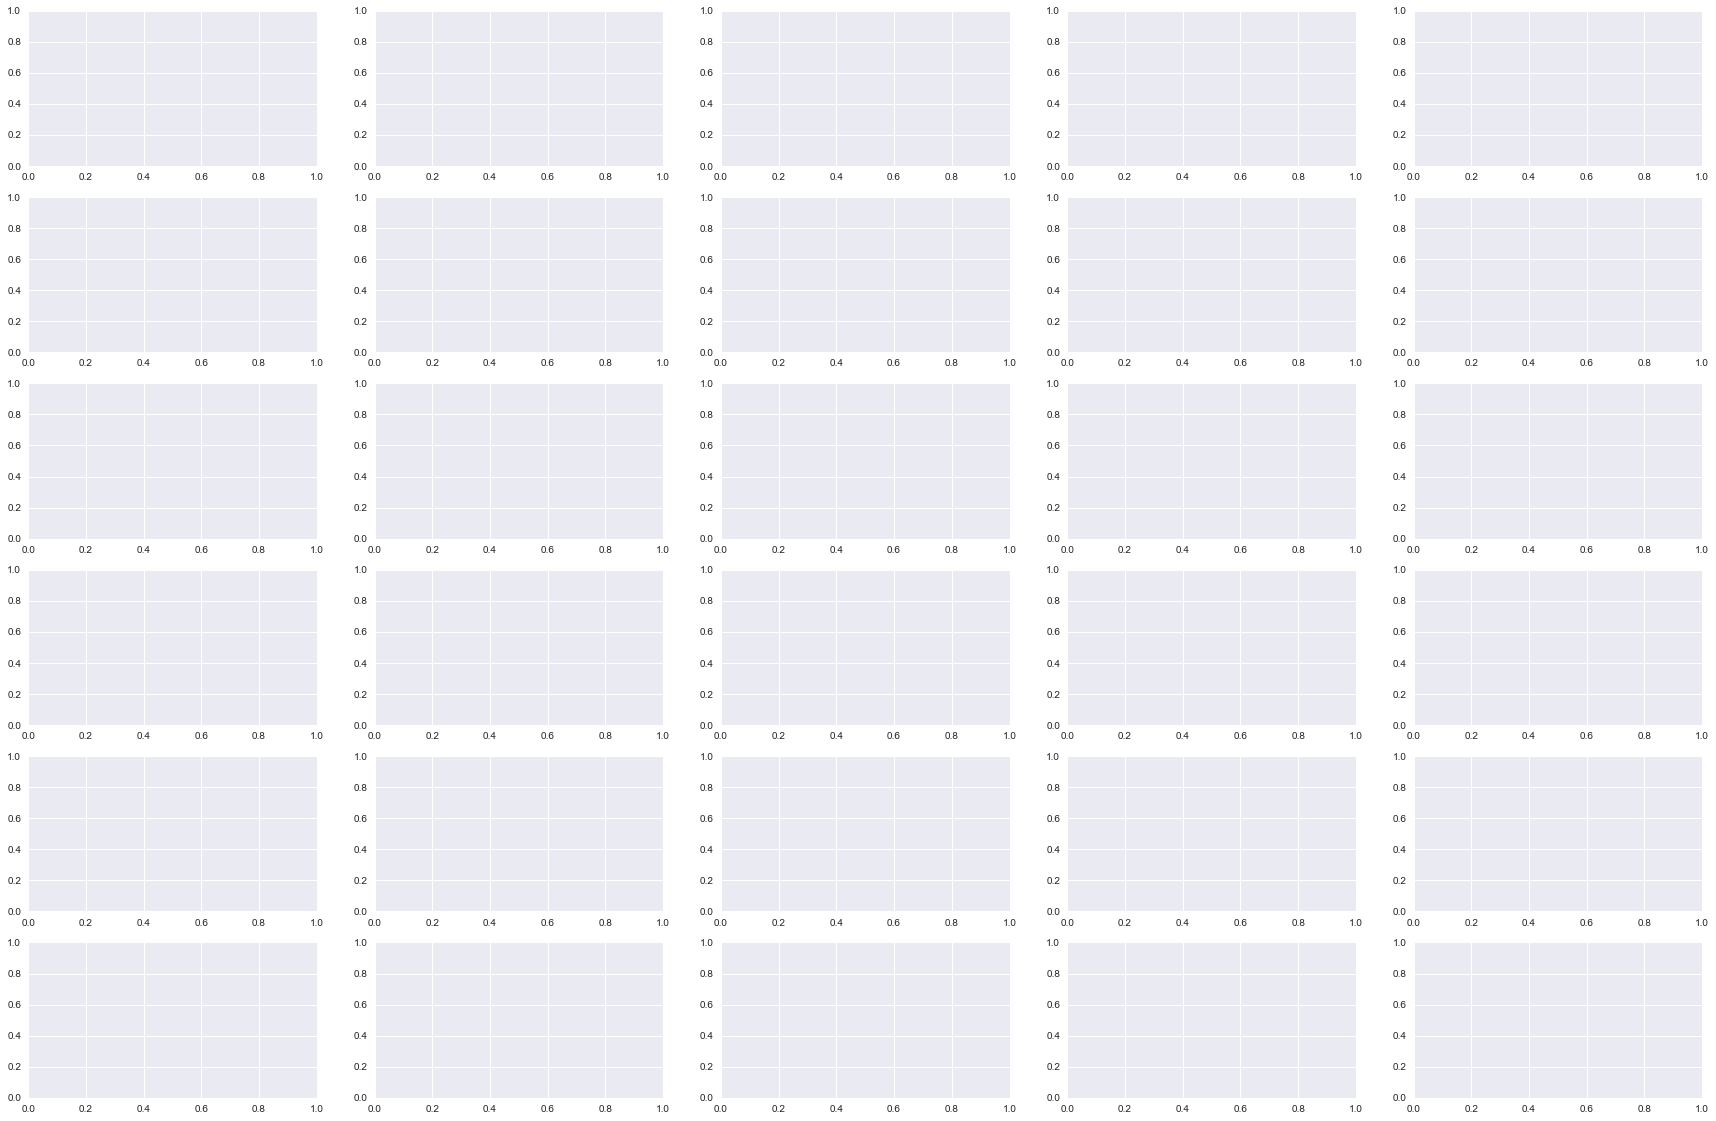

In [38]:
# We only looked at some of the features here, make sure to do a quick check for all the features (similar structure)
feat = data.loc[:, 'feat_1':'feat_30']
feat.hist(figsize=(30,20));

If you look at all the histograms, you can tell that a lot of the data are zero-inflated, so most of the variables contain mostly zeros and then some higher values here and there. No normality, but for most machine learning techniques this is not an issue.

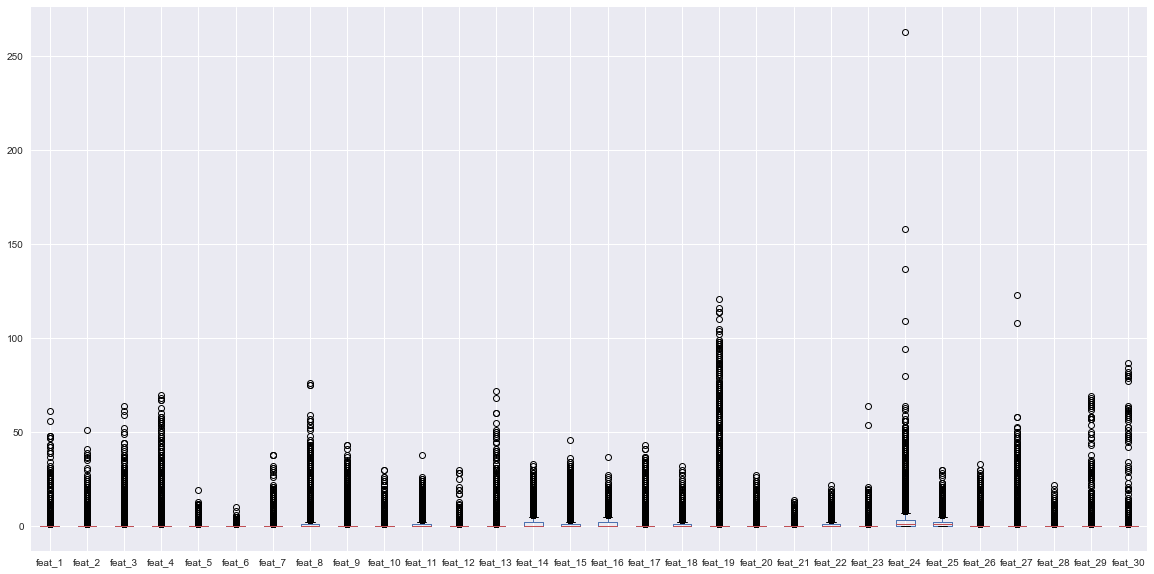

In [41]:
feat.boxplot(figsize=(20,10));

Because there are so many zeroes, most values above zero will seem to be outliers. The safe decision for this data is to not delete any outliers and see what happens. With many 0s, sparse data is available and high values may be super informative. Moreover, without having any intuitive meaning for each of the features, we don't know if a value of ~260 is actually an outlier.

In [42]:
# Is there any missing data?
feat.isna().any().any()

False

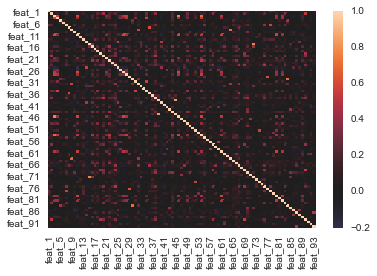

In [43]:
#Feature engineering and selection with PCA
feat = data.loc[:, 'feat_1':'feat_93']

import seaborn as sns
sns.heatmap(feat.corr(), center=0);

In [44]:
#Use PCA to select a number of features in a way that you still keep 80% of your explained variance.

from sklearn.decomposition import PCA
pca_1 = PCA(n_components=20)
pca_2 = PCA(n_components=40)
pca_3 = PCA(n_components=60)

principalComponents = pca_1.fit_transform(feat)
principalComponents = pca_2.fit_transform(feat)
principalComponents = pca_3.fit_transform(feat)

print(np.sum(pca_1.explained_variance_ratio_))
print(np.sum(pca_2.explained_variance_ratio_))
print(np.sum(pca_3.explained_variance_ratio_))

pca = PCA(n_components=27)
principalComponents = pca.fit_transform(feat)
print(np.sum(pca.explained_variance_ratio_))

0.7275575396752485
0.8885916980426873
0.9598319209340479
0.8004926726968731


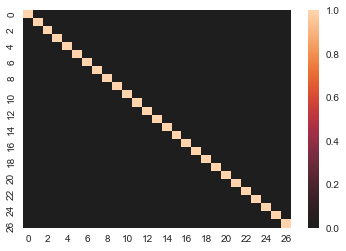

In [45]:
import seaborn as sns
sns.heatmap(pd.DataFrame(principalComponents).corr(), center=0);

In [46]:
#Create train test split
y = data['target']
X = data.loc[:, 'feat_1':'feat_93']

In [47]:
# Load and split the data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [48]:
#Create your baseline model in a pipeline setting
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Construct some pipelines
pipe_lr = Pipeline([('pca', PCA(n_components=27, random_state=123)), 
                    ('clf', LogisticRegression(random_state=123))])

# Fit the pipelines
pipe_lr.fit(X_train, y_train)

print(pipe_lr.score(X_test, y_test))

AttributeError: 'str' object has no attribute 'decode'

In [49]:
# ⏰ This cell may take several minutes to run
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

## KEEP IT FOR NOW
# Construct some pipelines
pipe_svm = Pipeline([('pca', PCA(n_components=27)), 
                     ('clf', svm.SVC(random_state=123))])
        
pipe_tree = Pipeline([('pca', PCA(n_components=27)), 
                      ('clf', tree.DecisionTreeClassifier(random_state=123))])

pipe_rf = Pipeline([('pca', PCA(n_components=27)), 
                    ('clf', RandomForestClassifier(random_state=123))])

# List of pipelines and pipeline names
pipelines = [pipe_svm, pipe_tree, pipe_rf]
pipeline_names = ['Support Vector Machine','Decision Tree','Random Forest']

# Loop to fit each of the three pipelines
for pipe in pipelines:
    print(pipe)
    pipe.fit(X_train, y_train)

# Compare accuracies
for index, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipeline_names[index], val.score(X_test, y_test)))

Pipeline(steps=[('pca', PCA(n_components=27)), ('clf', SVC(random_state=123))])
Pipeline(steps=[('pca', PCA(n_components=27)),
                ('clf', DecisionTreeClassifier(random_state=123))])
Pipeline(steps=[('pca', PCA(n_components=27)),
                ('clf', RandomForestClassifier(random_state=123))])
Support Vector Machine pipeline test accuracy: 0.753
Decision Tree pipeline test accuracy: 0.669
Random Forest pipeline test accuracy: 0.772


In [50]:
#Pipeline with GridSearch

# imports
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [51]:
# ⏰ This cell may take a long time to run!
# Construct pipeline
pipe_rf = Pipeline([('pca', PCA(n_components=27)), 
                    ('clf', RandomForestClassifier(random_state = 123))])

# Set grid search params
param_grid_forest = [ 
  {'clf__n_estimators': [120],
   'clf__criterion': ['entropy', 'gini'], 
   'clf__max_depth': [4, 5, 6],  
   'clf__min_samples_leaf':[0.05 ,0.1, 0.2],  
   'clf__min_samples_split':[0.05 ,0.1, 0.2]
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf, 
                     param_grid=param_grid_forest, 
                     scoring='accuracy', 
                     cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_rf.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_rf.best_score_)

# Best params
print('\nBest params:\n', gs_rf.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   8.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s remaining:    0.0s


[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   8.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.05, clf__n_estimators=120, total=   8.1s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   8.0s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=4, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   8.4s
[CV] clf__criterion=entropy, clf__max_depth=4, clf__min

[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.1, clf__n_estimators=120, total=   8.6s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   7.5s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   7.3s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=5, clf__min_samples_leaf=0.05, clf__min_samples_split=0.2, clf__n_estimators=120, total=   7.3s
[CV] clf__criterion=entropy, clf__max_depth=5, clf__min_sa

[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   5.3s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   5.4s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.05, clf__n_estimators=120, total=   5.6s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=entropy, clf__max_depth=6, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   5.2s
[CV] clf__criterion=entropy, clf__max_depth=6, clf__min_samp

[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.1, clf__n_estimators=120, total=   3.4s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   3.4s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   3.3s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.1, clf__min_samples_split=0.2, clf__n_estimators=120, total=   3.4s
[CV] clf__criterion=gini, clf__max_depth=4, clf__min_samples_leaf=0.2, clf__min_sample

[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   2.4s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.05, clf__n_estimators=120, total=   2.4s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   2.3s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_samples_split=0.1, clf__n_estimators=120, total=   2.4s
[CV] clf__criterion=gini, clf__max_depth=5, clf__min_samples_leaf=0.2, clf__min_sam

[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   2.3s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   2.2s
[CV] clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120 
[CV]  clf__criterion=gini, clf__max_depth=6, clf__min_samples_leaf=0.2, clf__min_samples_split=0.2, clf__n_estimators=120, total=   2.4s


[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed: 14.5min finished


Best accuracy: 0.624

Best params:
 {'clf__criterion': 'entropy', 'clf__max_depth': 6, 'clf__min_samples_leaf': 0.05, 'clf__min_samples_split': 0.05, 'clf__n_estimators': 120}


In [52]:
#Results overview
gs_rf.cv_results_

{'mean_fit_time': array([ 7.92187611,  7.9541328 ,  6.96415106,  5.28048007,  5.30289404,
         5.21490852,  2.61776606,  2.62053887,  2.59160868,  8.21660614,
         8.66937677,  7.15686878,  5.18815509,  5.2287999 ,  5.21449057,
         2.62832332,  2.59605678,  2.57026259,  8.35894561,  8.34461816,
         6.98103746,  5.25799235, 40.66001105,  5.74611886,  2.64345455,
         2.63907218,  2.6240015 ,  4.18631426,  4.19430192,  3.58482679,
         3.20481825,  3.21827873,  3.19728907,  2.0648396 ,  2.08337593,
         2.10001651,  4.41111096,  4.61830537,  3.86457515,  3.39220214,
         3.2998747 ,  3.48057024,  2.22182035,  2.14847922,  2.09566379,
         4.5079879 ,  4.51344053,  3.66782117,  3.24147177,  3.26210682,
         3.18659115,  2.07122445,  2.11768977,  2.17168244]),
 'std_fit_time': array([2.51181162e-02, 1.76847751e-01, 6.32811889e-02, 8.07108450e-02,
        1.03960206e-01, 1.72358252e-02, 2.21149785e-02, 5.46692525e-02,
        3.52176560e-02, 7.43045

In [53]:
#Adaboost

# ⏰ This cell may take several minutes to run
from sklearn.ensemble import AdaBoostClassifier
# Construct pipeline
pipe_ab = Pipeline([('pca', PCA(n_components=27)), 
                    ('clf', AdaBoostClassifier(random_state = 123))])

# Set grid search params
adaboost_param_grid = {
    'clf__n_estimators': [30, 50, 70],
    'clf__learning_rate': [1.0, 0.5, 0.1]
}

# Construct grid search
gs_ab = GridSearchCV(estimator=pipe_ab,
            param_grid=adaboost_param_grid,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_ab.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_ab.best_score_)

# Best params
print('\nBest params:\n', gs_ab.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   4.2s
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   4.1s
[CV] clf__learning_rate=1.0, clf__n_estimators=30 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=30, total=   4.2s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   6.6s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   6.7s
[CV] clf__learning_rate=1.0, clf__n_estimators=50 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=50, total=   6.6s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=70, total=   9.2s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] ..... clf__learning_rate=1.0, clf__n_estimators=70, total=   9.6s
[CV] clf__learning_rate=1.0, clf__n_estimators=70 ....................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  3.2min finished


Best accuracy: 0.662

Best params:
 {'clf__learning_rate': 0.5, 'clf__n_estimators': 50}


# PCA for Facial Image Recognition
PCA can be used for preprocessing facial image recognition data!

In [1]:
#Loading our dataset
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

In [2]:
data = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\msagu\scikit_learn_data


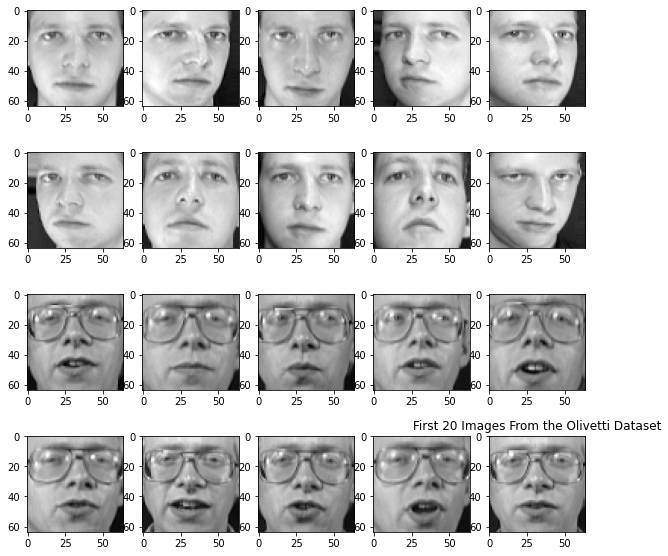

In [3]:
#Preview images in dataset
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10,10))
for n in range(20):
    i = n //5 #Operator // divides while rounding result down to nearest integer
    j = n%5
    ax = axes[i][j]
    ax.imshow(data.images[n], cmap=plt.cm.gray)
plt.title('First 20 Images From the Olivetti Dataset');

In [4]:
#Train a baseline classifier
from sklearn import svm
from sklearn.model_selection import train_test_split

In [6]:
#Perform train test split
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

#Instantiate & Fit classifier
clf = svm.SVC(C=5, gamma=0.05)
%timeit clf.fit(X_train, y_train)

#Check model performance
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
print('Training Accuracy: {}\tTesting Accuracy: {}'.format(train_acc, test_acc))

918 ms ± 137 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Training Accuracy: 1.0	Testing Accuracy: 0.74


In [ ]:
#Grid search on the baseline classifier
# ⏰ This cell may take over an hour to run!
import numpy as np
from sklearn.model_selection import GridSearchCV

clf = svm.SVC()
param_grid = {'C' : np.linspace(0.1, 10, num=11),
             'gamma' : np.linspace(10**-3, 5, num=11)}

grid_search = GridSearchCV(clf, param_grid, cv=5)

%timeit grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_estimator_.score(X_test, y_test)
#Score: 0.91

In [7]:
#preprocessing with PCA
from sklearn.decomposition import PCA

In [8]:
X[0].shape

(4096,)

In [9]:
pca = PCA(n_components=100, whiten=True)
X_pca_train = pca.fit_transform(X_train)
X_pca_train.shape

(300, 100)

In [10]:
X_pca_train[0].shape

(100,)

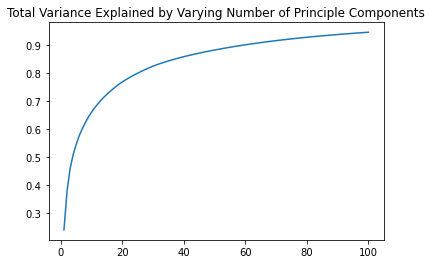

In [11]:
#Explore the explained variance captured by principal components
#How much of the total data was captured in these compressed representations?

plt.plot(range(1,101), pca.explained_variance_ratio_.cumsum())
plt.title('Total Variance Explained by Varying Number of Principle Components');

In [12]:
#Train a classifier on the compressed dataset
X_pca_test = pca.transform(X_test)
clf = svm.SVC()
%timeit clf.fit(X_pca_train, y_train)

39.3 ms ± 998 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
train_pca_acc = clf.score(X_pca_train, y_train)
test_pca_acc = clf.score(X_pca_test, y_test)
print('Training Accuracy: {}\tTesting Accuracy: {}'.format(train_pca_acc, test_pca_acc))

Training Accuracy: 1.0	Testing Accuracy: 0.93


In [16]:
#GridSearch for appropriate parameters
# ⏰ This cell may take several minutes to run
import numpy as np
from sklearn.model_selection import GridSearchCV

clf = svm.SVC()

param_grid = {'C' : np.linspace(0.1, 10, num=11),
             'gamma' : np.linspace(10**-3, 5, num=11)}

grid_search = GridSearchCV(clf, param_grid, cv=5)

%timeit grid_search.fit(X_pca_train, y_train)

22.6 s ± 200 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
grid_search.best_params_

{'C': 8.02, 'gamma': 0.001}

In [18]:
grid_search.best_estimator_.score(X_pca_test, y_test)

0.99

While this model may have lost some accuracy, it is clearly much faster to train. Let's take a moment to visualize some of the information captured by PCA. Specifically, you'll take a look at two perspectives. First, you'll take a look at visualizing the feature means. Second, you'll get to visualize the compressed encodings of the dataset.

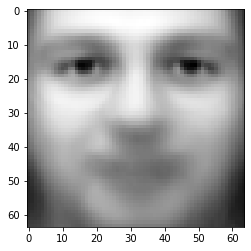

In [19]:
#Visualizing feature means
plt.imshow(X.mean(axis=0).reshape(data.images[0].shape), cmap=plt.cm.gray)

**Visualize compressed representations:** Visualizing the components from PCA is slightly tricky, as they have new dimensions which may not correspond accurately to the 64x64 size of the original images. Fortunately, scikit-learn provides a useful `.inverse_transformation()` method to PCA allowing you to reproject the compressed dataset back to the original size. This allows you to observe what features are retrieved and encapsulated within the principal components.

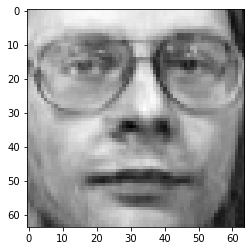

In [20]:
fig, axes
plt.imshow(pca.inverse_transform(X_pca_train[0]).reshape(64,64), cmap=plt.cm.gray)

To make this even more interesting, take a look at some of the varied levels of detail based on varying number of principle components:

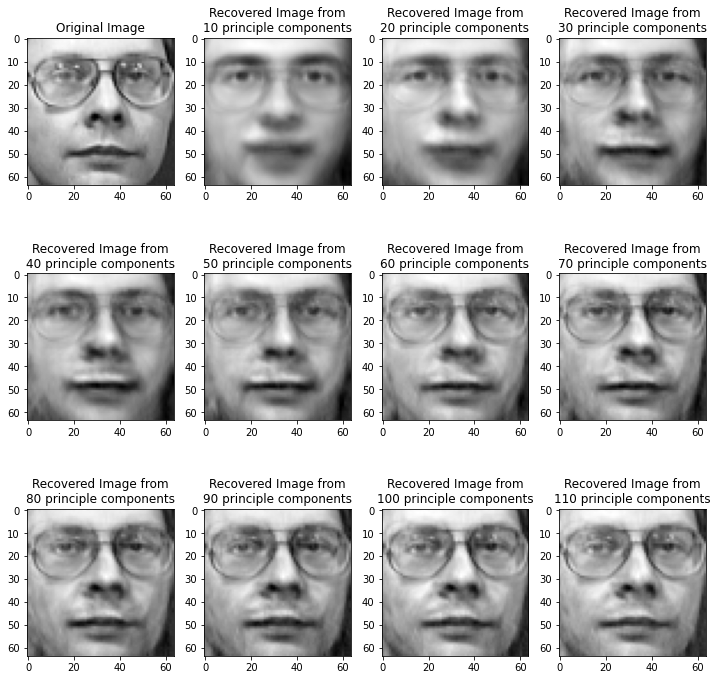

In [21]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(10,10))
ax = axes[0][0]
ax.set_title('Original Image')
ax.imshow(X_train[0].reshape(64,64), cmap=plt.cm.gray)
for n in range(1,12):
    i = n //4
    j = n%4
    ax = axes[i][j]
    ax.set_title('Re')
    n_feats = n*10
    pca = PCA(n_components=n_feats)
    pca.fit(X_train)
    compressed = pca.transform(X_train)
    ax.set_title('Recovered Image from\n{} principle components'.format(n_feats))
    ax.imshow(pca.inverse_transform(compressed[0]).reshape(64,64), cmap=plt.cm.gray)
plt.tight_layout()

# Image Recognition with PCA using MNIST dataset of handwritten digits

In [22]:
#loadng our dataset
from sklearn.datasets import load_digits
data = load_digits()
print(data.data.shape, data.target.shape)

(1797, 64) (1797,)


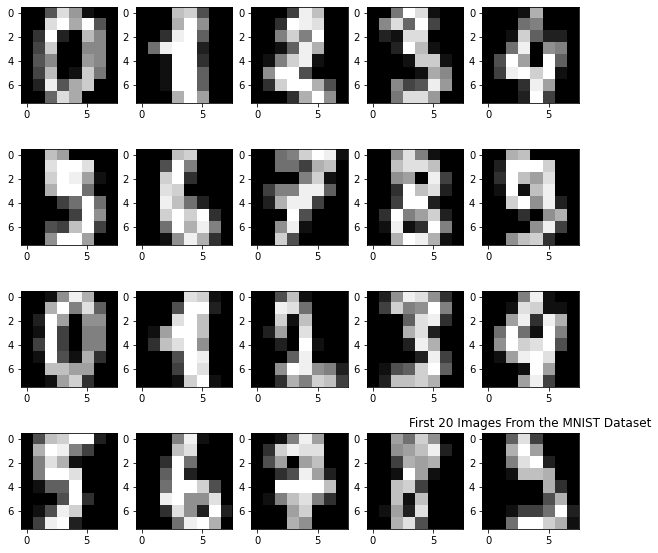

In [23]:
#Preview dataset
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10,10))
for n in range(20):
    i = n //5
    j = n%5
    ax = axes[i][j]
    ax.imshow(data.images[n], cmap=plt.cm.gray)
plt.title('First 20 Images From the MNIST Dataset');

In [24]:
#Baseline model
from sklearn import svm
from sklearn.model_selection import train_test_split
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=22)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1347, 64) (450, 64) (1347,) (450,)


In [25]:
# Fit a naive model
clf = svm.SVC(gamma='auto')
%timeit clf.fit(X_train, y_train)

266 ms ± 49 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
# Training and test accuracy
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
print('Training Accuracy: {}\tTesting Accuracy: {}'.format(train_acc, test_acc))

Training Accuracy: 1.0	Testing Accuracy: 0.58


Refine the initial model by performing a grid search to tune the hyperparameters. The two most important parameters to adjust are `'C'` and `'gamma'`. Once again, be sure to record the training time as well as the training and test accuracy.

In [27]:
#GridSearch baseline
# ⏰ Your code may take several minutes to run
import numpy as np
from sklearn.model_selection import GridSearchCV

clf = svm.SVC()

param_grid = {'C' : np.linspace(.1, 10, num=11),
             'gamma' : np.linspace(10**-3, 5, num=11)}

grid_search = GridSearchCV(clf, param_grid, cv=5)
%timeit grid_search.fit(X_train, y_train)

4min 3s ± 1min 12s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
# Print the best parameters 
grid_search.best_params_

{'C': 2.08, 'gamma': 0.001}

In [29]:
# Print the training and test accuracy 
train_acc = grid_search.best_estimator_.score(X_train, y_train)#None
test_acc = grid_search.best_estimator_.score(X_test, y_test) #None
print('Training Accuracy: {}\tTesting Accuracy: {}'.format(train_acc, test_acc))

Training Accuracy: 1.0	Testing Accuracy: 0.9911111111111112


In [30]:
#Printing test and training accuracy
train_acc = grid_search.best_estimator_.score(X_train, y_train)
test_acc = grid_search.best_estimator_.score(X_test, y_test)
print('Training Accuracy: {}\tTesting Accuracy: {}'.format(train_acc, test_acc))

Training Accuracy: 1.0	Testing Accuracy: 0.9911111111111112


**Compressing with PCA**:Now that you've fit a baseline classifier, it's time to explore the impacts of using PCA as a preprocessing technique. To start, perform PCA on `X_train`. (Be sure to only fit PCA to `X_train`; you don't want to leak any information from the test set.) Also, don't reduce the number of features quite yet. You'll determine the number of features needed to account for 95% of the overall variance momentarily.

In [31]:
from sklearn.decomposition import PCA
import seaborn as sns
sns.set_style('darkgrid')

In [32]:
pca = PCA()
X_pca = pca.fit_transform(X_train)

Plot the explained variance versus the number of features. In order to determine the number of features you wish to reduce the dataset to, it is sensible to plot the overall variance accounted for by the first $n$ principal components. Create a graph of the variance explained versus the number of principal components.

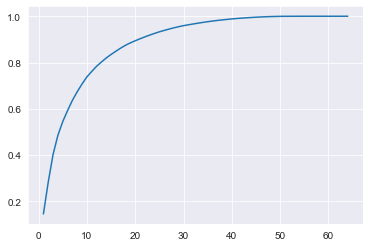

In [33]:
plt.plot(range(1,65), pca.explained_variance_ratio_.cumsum())

In [34]:
#Great! Now determine the number of features needed to capture 95% of the dataset's overall variance.
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance >= .95])
n_to_reach_95 = X.shape[1] - n_over_95 + 1
print("Number features: {}\tTotal Variance Explained: {}".format(n_to_reach_95, total_explained_variance[n_to_reach_95-1]))

Number features: 29	Total Variance Explained: 0.9549611953216071


In [35]:
#Subset the dataset to these principal components which capture 95% of the overall variance
pca = PCA(n_components=n_to_reach_95)
X_pca_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_.cumsum()[-1]

0.9549599727203185

In [36]:
#Refit a model on the compressed dataset
X_pca_test = pca.transform(X_test)
clf = svm.SVC(gamma='auto')
%timeit clf.fit(X_pca_train, y_train)

211 ms ± 11.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
train_pca_acc = clf.score(X_pca_train, y_train)
test_pca_acc = clf.score(X_pca_test, y_test)
print('Training Accuracy: {}\tTesting Accuracy: {}'.format(train_pca_acc, test_pca_acc))

Training Accuracy: 1.0	Testing Accuracy: 0.14888888888888888


Finally, use grid search to find optimal hyperparameters for the classifier on the reduced dataset. Be sure to record the time required to fit the model, the optimal hyperparameters and the test and train accuracy of the resulting model.

In [ ]:
clf = svm.SVC()

param_grid = {'C' : np.linspace(.1, 10, num=11),
             'gamma' : np.linspace(10**-3, 5, num=11)}

grid_search = GridSearchCV(clf, param_grid, cv=5)
%timeit grid_search.fit(X_pca_train, y_train)

In [ ]:
#Printing best parameters
grid_search.best_params_

In [ ]:
#Priniting train and test accuracy
train_acc = grid_search.best_estimator_.score(X_pca_train, y_train)
test_acc = grid_search.best_estimator_.score(X_pca_test, y_test)
print('Training Accuracy: {}\tTesting Accuracy: {}'.format(train_acc, test_acc))

## PCA Background: Covariance Matrix and Eigendecomposition
**Eigendecomposition** is one form of matrix decomposition. Decomposing a matrix means that you want to find a product of matrices that is equal to the initial matrix. In the case of the eigendecomposition, you decompose the initial matrix into the product of its __eigenvectors__ and __eigenvalues__.

A vector $v$ is an __eigenvector__ of a __square__ matrix $A$ if it satisfies the following equation:

$$Av = \lambda v$$.

Here, __lambda__ ($\lambda$) represents the __eigenvalue__ scalar.

__The parent matrix can be shown to be a product of the eigenvectors and eigenvalues.__

A decomposition operation breaks down a matrix into constituent parts to make certain operations on the matrix easier to perform. Eigendecomposition is used as an element to simplify the calculation of other, more complex matrix operations.

__Eigenvectors__ are unit vectors, with length or magnitude equal to 1.0. They are often referred to as right vectors, which simply means a column vector (as opposed to a row vector or a left vector). Imagine a transformation matrix that, when multiplied on the left, reflected vectors in the line $y=x$. You can see that if there were a vector that lay on the line $y=x$, it’s reflection is itself. This vector (and all multiples of it), would be an eigenvector of that transformation matrix.

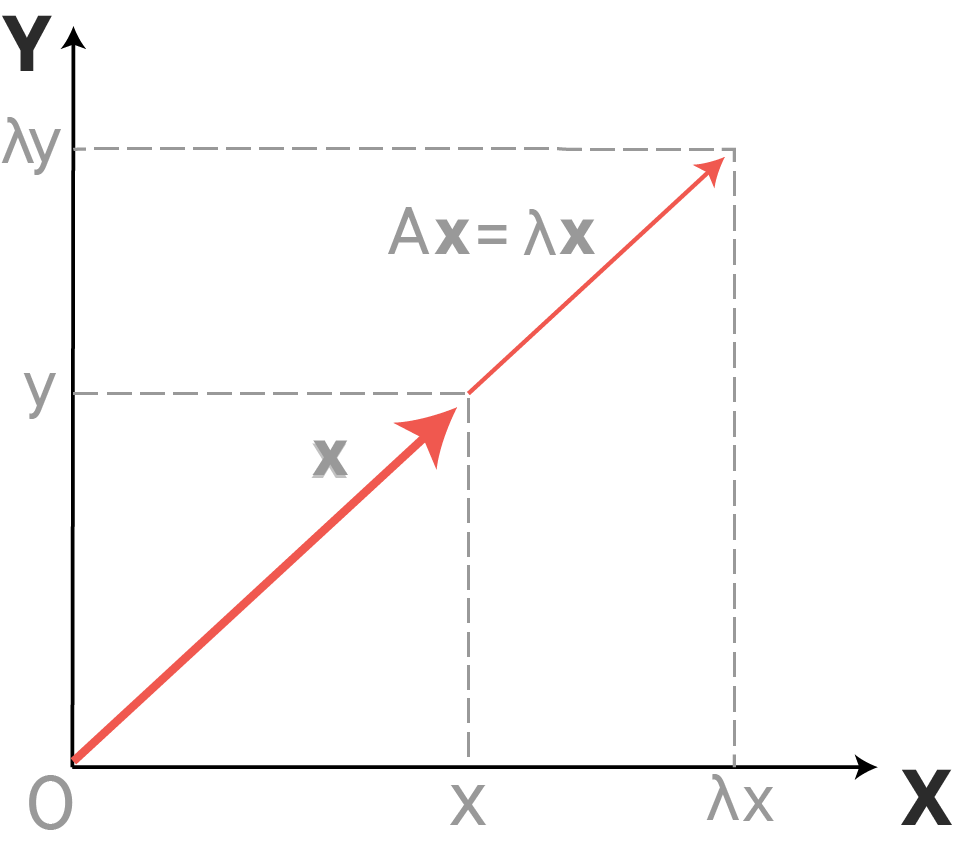

__Eigenvalues__ are coefficients applied to eigenvectors that give the vectors their length or magnitude. For example, a negative eigenvalue may reverse the direction of the eigenvector as part of scaling it. Eigenvalues are closely related to eigenvectors.

A matrix that has only positive eigenvalues is referred to as a __positive definite matrix__, whereas if the eigenvalues are all negative, it is referred to as a __negative definite matrix__.

Decomposing a matrix in terms of its eigenvalues and its eigenvectors gives valuable insights into the properties of the matrix. Certain matrix calculations, like computing the power of the matrix, become much easier when we use the eigendecomposition of the matrix. The eigendecomposition can be calculated in NumPy using the `eig()` function.

In [2]:
# Eigendecomposition
from numpy import array
from numpy.linalg import eig

# Define matrix
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(A)

print('-----------------')

# Calculate eigendecomposition
values, vectors = eig(A)
print(values)

print('-----------------')
print(vectors)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------
[ 1.61168440e+01 -1.11684397e+00 -9.75918483e-16]
-----------------
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


Above, the eigenvectors are returned as a matrix with the same dimensions as the parent matrix (3x3), where each column is an eigenvector, e.g. the first eigenvector is vectors[:,0]. Eigenvalues are returned as a list, where value indices in the returned array are paired with eigenvectors by column index, e.g. the first eigenvalue at values[0] is paired with the first eigenvector at vectors[: 0].

You can also test whether the first vector and value are in fact an eigenvalue and eigenvector for the matrix.

In [3]:
# Confirm first eigenvector
B = A.dot(vectors[:, 0])
print(B)
print('-----------------')
C = vectors[:, 0] * values[0]
print(C)

[ -3.73863537  -8.46653421 -13.19443305]
-----------------
[ -3.73863537  -8.46653421 -13.19443305]


You can also reverse the process and reconstruct the original matrix given only the eigenvectors and eigenvalues.

First, the list of eigenvectors must be converted into a matrix, where each vector becomes a row. The eigenvalues need to be arranged into a diagonal matrix. The NumPy `diag()` function can be used for this. Next, you need to calculate the inverse of the eigenvector matrix, which we can be achieved with the `inv()` function. Finally, these elements need to be multiplied together with the `.dot()` method.

In [6]:
#Reconstructing original matrix
import numpy as np
from numpy.linalg import inv
# Create matrix from eigenvectors
Q = vectors

# Create inverse of eigenvectors matrix
R = inv(Q)

# Create diagonal matrix from eigenvalues
L = np.diag(values)

# Reconstruct the original matrix
B = Q.dot(L).dot(R)
print(B)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


### Performing Principal Component Analysis
**Ojectives** (List the steps required to perform PCA on a given dataset; Decompose and reconstruct a matrix using eigendecomposition & Perform a covariance matrix calculation with NumPy)

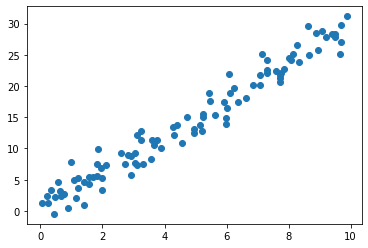

In [8]:
#Step 1: Generate Random Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

x1 = np.random.uniform(low=0, high=10, size=100)
x2 = [(xi*3)+np.random.normal(scale=2) for xi in x1]
plt.scatter(x1, x2);

In [9]:
# Step 2: subtract the mean from each dimension of the data
data = pd.DataFrame([x1,x2]).transpose()
data.columns = ['x1', 'x2']
data.head()

,x1,x2
0,3.745401,11.410298
1,9.507143,27.923414
2,7.319939,22.143340
3,5.986585,13.984617
4,1.560186,4.241215


In [10]:
data.mean()

x1     4.701807
x2    14.103262
dtype: float64

In [11]:
#Normalized Data
mean_centered = data - data.mean()
mean_centered.head()

,x1,x2
0,-0.956406,-2.692964
1,4.805336,13.820153
2,2.618132,8.040078
3,1.284777,-0.118645
4,-3.141621,-9.862046


In [12]:
#Step 3: calculating the covariance matrix
cov = np.cov([mean_centered['x1'], mean_centered['x2']])
cov

array([[ 8.84999497, 25.73618675],
       [25.73618675, 78.10092586]])

In [13]:
#Step 4: Calculate the eigenvectors and eigenvalues of the covariance matrix
#These will form the new axes when it's time to reproject the dataset on the new basis.
eigen_value, eigen_vector = np.linalg.eig(cov)
eigen_vector

array([[-0.94936397, -0.31417837],
       [ 0.31417837, -0.94936397]])

In [14]:
eigen_value

array([ 0.33297363, 86.61794719])

If you look at the eigenvectors and eigenvalues above, you can see that the eigenvalues have very different values. In fact, it turns out that **the eigenvector with the highest eigenvalue is the principal component of the dataset.**

In general, once eigenvectors are found from the covariance matrix, the next step is to order them by eigenvalue in descending order. This gives us the components in order of significance. Typically, PCA will be used to reduce the dimensionality of the dataset and as such, some of these eigenvectors will be subsequently discarded. In general, the smaller the eigenvalue relative to others, the less information encoded within said feature.

Finally, you need to form a __feature vector__, which is just a fancy name for a matrix of vectors. This is constructed by taking the eigenvectors that you want to keep from the list of eigenvectors, and forming a matrix with these eigenvectors in the columns as shown below:

In [15]:
#Step 5: Choosing components and forming a feature vector
# Get the index values of the sorted eigenvalues
e_indices = np.argsort(eigen_value)[::-1] 

# Sort
eigenvectors_sorted = eigen_vector[:, e_indices]
eigenvectors_sorted

array([[-0.31417837, -0.94936397],
       [-0.94936397,  0.31417837]])

This the final step in PCA, and is also the easiest. Once you have chosen the components (eigenvectors) that you wish to keep in our data and formed a feature vector, you simply take the transpose of the vector and multiply it on the left of the original dataset, transposed.

In [16]:
# Step 5: Deriving the new dataset
transformed = eigenvectors_sorted.dot(mean_centered.T).T
transformed[:5]

array([[  2.85708504,   0.06190663],
       [-14.63008778,  -0.2200194 ],
       [ -8.45552104,   0.04045849],
       [ -0.29101209,  -1.25699704],
       [ 10.34970068,  -0.11589976]])

## Performing PCA (Food USA Dataset)

In [17]:
#Import Data
import pandas as pd
data = pd.read_csv('foodusa.csv', index_col=0)
data.head()

,Bread,Burger,Milk,Oranges,Tomatoes
City,,,,,
ATLANTA,24.5,94.5,73.9,80.1,41.6
BALTIMORE,26.5,91.0,67.5,74.6,53.3
BOSTON,29.7,100.8,61.4,104.0,59.6
BUFFALO,22.8,86.6,65.3,118.4,51.2
CHICAGO,26.7,86.7,62.7,105.9,51.2


In [18]:
#Normalize data
data = data - data.mean()
data.head()

,Bread,Burger,Milk,Oranges,Tomatoes
City,,,,,
ATLANTA,-0.791304,2.643478,11.604348,-22.891304,-7.165217
BALTIMORE,1.208696,-0.856522,5.204348,-28.391304,4.534783
BOSTON,4.408696,8.943478,-0.895652,1.008696,10.834783
BUFFALO,-2.491304,-5.256522,3.004348,15.408696,2.434783
CHICAGO,1.408696,-5.156522,0.404348,2.908696,2.434783


In [19]:
#Calculate covariance
cov_mat = data.cov()
cov_mat

,Bread,Burger,Milk,Oranges,Tomatoes
Bread,6.284466,12.910968,5.719051,1.310375,7.285138
Burger,12.910968,57.077115,17.507530,22.691877,36.294783
Milk,5.719051,17.507530,48.305889,-0.275040,13.443478
Oranges,1.310375,22.691877,-0.275040,202.756285,38.762411
Tomatoes,7.285138,36.294783,13.443478,38.762411,57.800553


In [20]:
#Calculate eigenvectors
import numpy as np
eig_values, eig_vectors = np.linalg.eig(cov_mat)

In [21]:
#Sort eigenvetors
# Get the index values of the sorted eigenvalues
e_indices = np.argsort(eig_values)[::-1] 

# Sort
eigenvectors_sorted = eig_vectors[:, e_indices]
eigenvectors_sorted

array([[-0.02848905, -0.16532108,  0.02135748, -0.18972574, -0.96716354],
       [-0.2001224 , -0.63218494,  0.25420475, -0.65862454,  0.24877074],
       [-0.0416723 , -0.44215032, -0.88874949,  0.10765906,  0.03606094],
       [-0.93885906,  0.31435473, -0.12135003, -0.06904699, -0.01521357],
       [-0.27558389, -0.52791603,  0.36100184,  0.71684022, -0.03429221]])

In [22]:
#Reprojecting the data
transformed = eigenvectors_sorted[:2].dot(data.T).T
transformed

array([[ 11.10636706,  14.73134932],
       [  1.21900301,  21.44989411],
       [-12.29365615,  -4.73286484],
       [ -4.27410508,  -4.95746329],
       [ -2.08570219,   1.77071529],
       [  2.02322957,  -4.83130671],
       [  0.76513968,  -5.78241861],
       [  5.01990281,  -7.08302707],
       [ -5.28963606,  -7.18560259],
       [-20.29491244, -21.8073279 ],
       [  6.65984778,   1.94000258],
       [  6.31128707,   2.48929146],
       [ 14.12127203,  10.53050299],
       [ -6.30360841,  -4.25846371],
       [ -2.70119271,  -4.22170394],
       [-17.39101398, -11.4694373 ],
       [-11.5197783 ,   7.50279463],
       [ -3.85046231, -12.11400365],
       [  0.02742717,  -9.57890292],
       [ 16.08930141,   7.15585369],
       [  7.92495397,   0.76667379],
       [  8.40796253,  16.30333807],
       [  6.32837355,  13.38210659]])